In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
import scipy
from scipy import io

In [2]:
data = io.loadmat('ex5data1.mat')
print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval']


In [3]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

Text(0, 0.5, 'y')

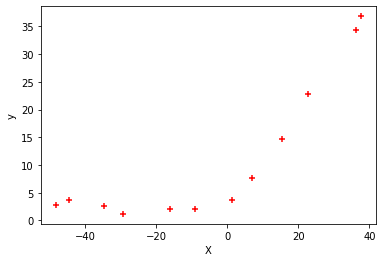

In [4]:
plt.scatter(X, y, c='r', marker='+')
plt.xlabel('X')
plt.ylabel('y')

In [5]:
def addLeftColumn(X):
    '''add np.ones as a column on the left of X
    '''
    m = X.shape[0]
    return np.hstack((np.ones((m,1)), X))

In [6]:
def linearRegCostFunc(theta, X, y, lambd):
    '''
    args:
        X.shape=(12,1)
        y.shape=(12,1)
        theta.shape=(2,1)
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n+1,1))
    X = addLeftColumn(X)
    h = np.dot(X, theta).reshape(y.shape)
    J = np.sum((h-y)**2)/(2*m) + lambd/(2*m)*np.sum(theta[1:]**2)
    grad = np.dot(X.T, h-y) / m
    grad[1:] += theta[1:]*lambd/m

    return J, grad

In [7]:
J, grad = linearRegCostFunc(np.array([[1],[1]]), X, y, 1)
print(J)
print(grad)


303.9931922202643
[[-15.30301567]
 [598.25074417]]


In [8]:
def linearRegGetJ(theta, X, y, lambd):
    J, _ = linearRegCostFunc(theta, X, y, lambd)
    return J

In [9]:
def linearRegGetGrad(theta, X, y, lambd):
    _, grad = linearRegCostFunc(theta, X, y, lambd)
    return grad

In [10]:
def trainLinearReg(init_theta, X, y, lambd):
    result = op.minimize(fun=linearRegGetJ, x0=init_theta, args=(X, y, lambd), method='TNC', jac=linearRegGetGrad)
    return result.x

In [11]:
init_theta = np.zeros((2,1))
opt_theta1 = trainLinearReg(init_theta, X, y, 0).reshape((2,1))

In [12]:
def plotFitData(op_theta, X, y):
    plt.scatter(X, y, c='r', marker='+')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X, addLeftColumn(X).dot(op_theta))
    plt.show

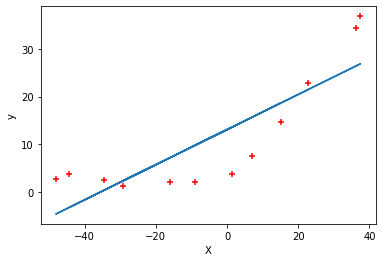

In [13]:
plotFitData(opt_theta1, X, y)

In [14]:
def learningCurve(X, y, Xval, yval, lambd):
    m = X.shape[0]
    n = X.shape[1]
    init_theta = np.zeros((n+1,1))
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    for i in range(m):
        theta = trainLinearReg(init_theta, X[0:i+1,:], y[0:i+1,:], lambd)
        error_train[i], _ = linearRegCostFunc(theta, X[0:i+1,:], y[0:i+1,:], 0)
        error_val[i], _ = linearRegCostFunc(theta, Xval, yval, 0)
    return error_train, error_val

In [15]:
error_train, error_val = learningCurve(X, y, Xval, yval, 0)

<function matplotlib.pyplot.show(close=None, block=None)>

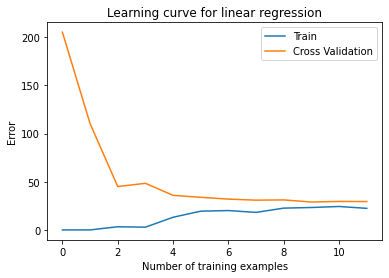

In [16]:
plt.plot(np.arange(12), error_train)
plt.plot(np.arange(12), error_val)
plt.legend(['Train', 'Cross Validation'])
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show

In [17]:
def polyFeatures(X, p):
    m = X.shape[0]
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:,i] = (X**(i+1)).flatten()
    return X_poly

In [18]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [19]:
X_poly = polyFeatures(X, 8)
X_poly, mu, sigma = featureNormalize(X_poly)

In [20]:
X_poly_test = polyFeatures(Xtest, 8)
X_poly_test, _, _ = featureNormalize(X_poly_test)

In [21]:
X_poly_val = polyFeatures(Xval, 8)
X_poly_val, _, _ = featureNormalize(X_poly_val)

In [22]:
lambd = 1
init_theta = np.zeros((9,1))
opt_theta2 = trainLinearReg(init_theta, X_poly, y, lambd).reshape((9,1))

In [23]:
def plotFit(minX, maxX, mu, sigma, theta, p):
    x = np.arange(minX-15, maxX+25, 0.05)
    X_poly_t = polyFeatures(x, p)
    X_poly_t = (X_poly_t - mu)/sigma
    X_poly_t = addLeftColumn(X_poly_t)
    plt.plot(x, X_poly_t.dot(theta))

Text(0.5, 1.0, 'Polynomial Regression Fit (lambda =  1)')

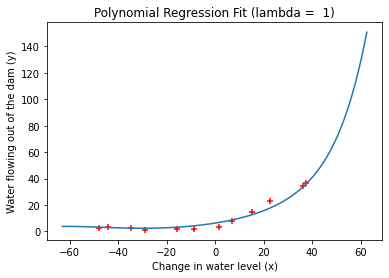

In [24]:
plt.scatter(X, y, c='r', marker='+')
plotFit(np.min(X), np.max(X), mu, sigma, opt_theta2, 8)
plt.show
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.title ('Polynomial Regression Fit (lambda = {:2})'.format(lambd))

<function matplotlib.pyplot.show(close=None, block=None)>

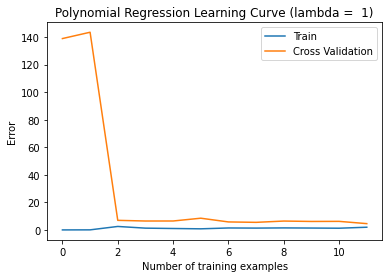

In [25]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambd)
plt.plot(np.arange(12), error_train)
plt.plot(np.arange(12), error_val)
plt.legend(['Train', 'Cross Validation'])
plt.title('Polynomial Regression Learning Curve (lambda = {:2})'.format(lambd))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show

In [26]:
def validationCurve(X, y, Xval, yval):
    lambd_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    length = lambd_vec.shape[0]
    lambd_vec = lambd_vec.reshape((length, 1))
    error_train = np.zeros((length, 1))
    error_val = np.zeros((length, 1))
    init_theta = np.zeros((X.shape[1]+1, 1))
    for i in range(length):
        lambd = lambd_vec[i]
        theta = trainLinearReg(init_theta, X, y, lambd)
        error_train[i], _ = linearRegCostFunc(theta, X, y, lambd)
        error_val[i], _ = linearRegCostFunc(theta, Xval, yval, lambd)
    return lambd_vec, error_train, error_val

In [27]:
lambd_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

<function matplotlib.pyplot.show(close=None, block=None)>

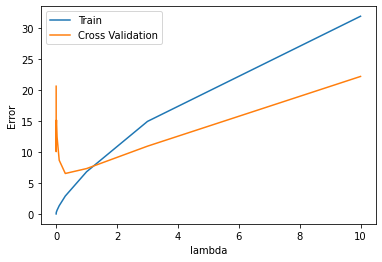

In [28]:
plt.plot(lambd_vec, error_train)
plt.plot(lambd_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show

In [29]:
d = {
    'lambda': lambd_vec.flatten(),
    'Train Error': error_train.flatten(),
    'Validation Error': error_val.flatten()}
df = pd.DataFrame(d, index=np.arange(10))

In [30]:
df

,lambda,Train Error,Validation Error
0,0.000,0.035495,20.608140
1,0.001,0.169508,10.065928
2,0.003,0.243172,14.441164
3,0.010,0.371282,15.153821
4,0.030,0.636703,12.401593
5,0.100,1.360572,8.676860
6,0.300,2.917649,6.549205
7,1.000,6.830463,7.340407
8,3.000,14.937646,10.948860
9,10.000,31.878154,22.181180
